In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [208]:
df=sns.load_dataset("diamonds")

In [209]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [214]:
X, y=df.drop("price",1), df.price

In [215]:
df["price"]=y

In [196]:
from category_encoders import TargetEncoder

In [217]:
te=TargetEncoder()
df_te=te.fit_transform(X,y)
df_te["price"]=y
df=df_te

In [219]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,3457.541970,3076.752475,5063.028606,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4584.257704,3076.752475,3996.001148,59.8,61.0,3.89,3.84,2.31,326
2,0.23,3928.864452,3076.752475,3839.455391,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4584.257704,5091.874954,3924.989395,62.4,58.0,4.20,4.23,2.63,334
4,0.31,3928.864452,5323.818020,5063.028606,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,3457.541970,3169.954096,3996.001148,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,3928.864452,3169.954096,3996.001148,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,3981.759891,3169.954096,3996.001148,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,4584.257704,4486.669196,5063.028606,61.0,58.0,6.15,6.12,3.74,2757


# Local Outlier Factor

In [220]:
from pyod.models.lof import LOF

In [221]:
lof=LOF(n_neighbors=20, metric="manhattan")
lof.fit(df)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='manhattan',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [222]:
scores=lof.decision_function(df)
scores

array([1.77955056, 2.17746986, 1.86435141, ..., 0.96169584, 1.02513648,
       1.02264355])

In [223]:
probs=lof.predict_proba(df)[:,1]

In [224]:
tablo=pd.DataFrame({
    "lof_scores":scores,
    "probs":probs
}).sort_values(by="lof_scores", ascending=False)

In [225]:
tablo[:10]

,lof_scores,probs
30187,44.063924,0.914598
30341,23.384179,0.476552
30340,23.342116,0.475661
35826,19.791068,0.400441
39942,16.502703,0.330786
33521,9.830943,0.189462
33522,9.355285,0.179387
32551,8.805555,0.167742
51977,8.782695,0.167258
15764,8.230958,0.155571


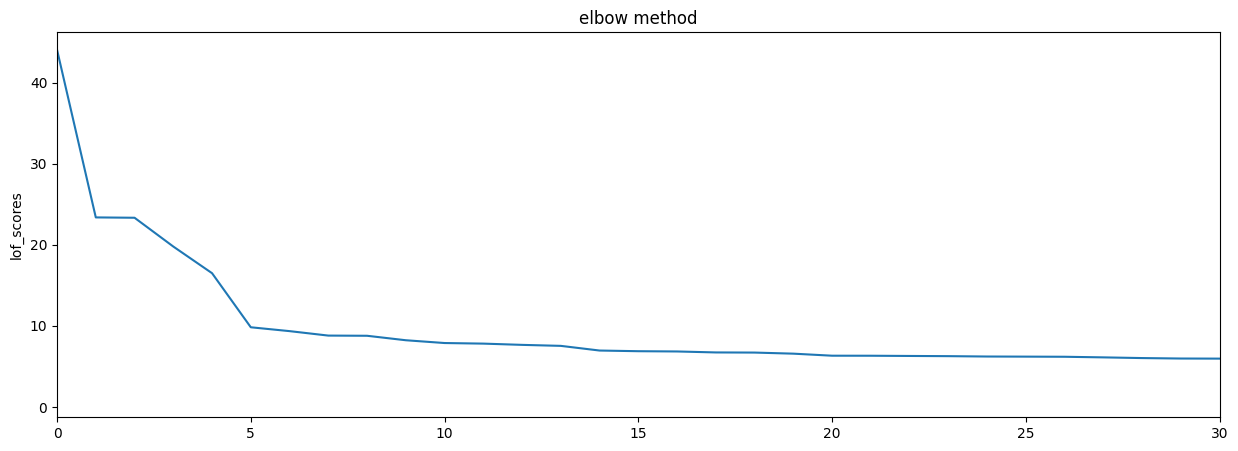

In [226]:
tablo.reset_index(drop=True)["lof_scores"].plot(xlim=[0,30], figsize=(15,5), ylabel="lof_scores", title="elbow method");

In [227]:
tablo[tablo["lof_scores"]>10]

,lof_scores,probs
30187,44.063924,0.914598
30341,23.384179,0.476552
30340,23.342116,0.475661
35826,19.791068,0.400441
39942,16.502703,0.330786
